
* 데이터:   [한국전력공사_사업소별 월별 에너지 사용내역(상세)](https://www.data.go.kr/dataset/15039565/fileData.do)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 0.

파일명이 energy_2019.csv인 데이터를 읽어와 energy 라는 변수명으로 저장하기

In [12]:
cd /content/drive/My Drive/Colab Notebooks/200406-13/data/

/content/drive/My Drive/Colab Notebooks/200406-13/data


In [13]:
from pathlib import Path
import os


path = ''

energy = pd.read_csv(os.path.join('./koreaE.csv'),encoding = "euc-kr")#--코드 작성--# 
energy

,1차 사업소,사용년월,부생연료사용량,등유사용량,전력사용량,가스사용량,경유사용량,지역난방사용량,지하수사용량,상수도사용량,연탄사용량
0,강원본부,2019-01-01,0,9650,1818968,0,0,0.0,NaN,2708.0,0
1,강원본부,2019-02-01,0,5210,1751332,0,0,0.0,NaN,2739.0,0
2,강원본부,2019-03-01,0,11500,1416864,0,0,0.0,NaN,2562.0,0
3,강원본부,2019-04-01,0,0,1361492,0,0,0.0,NaN,3123.0,0
4,강원본부,2019-05-01,0,0,1202208,0,0,0.0,NaN,3127.0,0
...,...,...,...,...,...,...,...,...,...,...,...
305,한국전력,2019-07-01,0,0,269901,0,0,0.0,NaN,0.0,0
306,한국전력,2019-09-01,0,0,256295,0,0,0.0,NaN,0.0,0
307,한국전력,2019-10-01,0,0,227905,0,0,0.0,NaN,0.0,0
308,한국전력,2019-12-01,0,0,249005,0,0,0.0,NaN,0.0,0


#1 .
describe 메서드를 사용하여 데이터를 전체적으로 훑어보기. 그리고 값이 하나도 없는 **컬럼**을 삭제해보기.

In [14]:
#--코드 작성--# 
energy.describe()

,부생연료사용량,등유사용량,전력사용량,가스사용량,경유사용량,지역난방사용량,지하수사용량,상수도사용량,연탄사용량
count,310.000000,310.000000,3.100000e+02,310.000000,310.000000,310.000000,0.0,310.000000,310.0
mean,5457.235484,1970.380645,1.231901e+06,796.012903,845.829032,569.557387,NaN,18650.844516,0.0
std,19915.682138,11825.482274,1.135749e+06,7263.894292,4314.154811,4643.565479,NaN,79582.986401,0.0
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,0.0
25%,0.000000,0.000000,1.281202e+05,0.000000,0.000000,0.000000,NaN,1531.000000,0.0
50%,0.000000,0.000000,1.007574e+06,0.000000,0.000000,0.000000,NaN,3698.000000,0.0
75%,0.000000,0.000000,2.084996e+06,0.000000,0.000000,0.000000,NaN,9640.500000,0.0
max,200000.000000,150000.000000,4.156776e+06,84490.000000,45790.000000,64492.000000,NaN,936423.000000,0.0


In [36]:
#--코드 작성--# 

# 컬럼을 삭제 하고 싶으니 axis=1, 전부다가 0이면 삭제하자 how=all
energy.dropna(axis=1, how="all")

,1차 사업소,사용년월,부생연료사용량,등유사용량,전력사용량,가스사용량,경유사용량,지역난방사용량,상수도사용량,연탄사용량
0,강원본부,2019-01-01,0,9650,1818968,0,0,0.0,2708.0,0
1,강원본부,2019-02-01,0,5210,1751332,0,0,0.0,2739.0,0
2,강원본부,2019-03-01,0,11500,1416864,0,0,0.0,2562.0,0
3,강원본부,2019-04-01,0,0,1361492,0,0,0.0,3123.0,0
4,강원본부,2019-05-01,0,0,1202208,0,0,0.0,3127.0,0
...,...,...,...,...,...,...,...,...,...,...
305,한국전력,2019-07-01,0,0,269901,0,0,0.0,0.0,0
306,한국전력,2019-09-01,0,0,256295,0,0,0.0,0.0,0
307,한국전력,2019-10-01,0,0,227905,0,0,0.0,0.0,0
308,한국전력,2019-12-01,0,0,249005,0,0,0.0,0.0,0


In [23]:
'''
 	1차사업소 	사용년월 	부생연료사용량 	등유사용량 	전력사용량 	가스사용량 	경유사용량 	지역난방사용량 	상수도사용량 	연탄사용량
0 	강원본부 	201901 	0 	9650 	1818968 	0 	0 	0.0 	2708.0 	0
1 	강원본부 	201902 	0 	5210 	1751332 	0 	0 	0.0 	2739.0 	0
2 	강원본부 	201903 	0 	11500 	1416864 	0 	0 	0.0 	2562.0 	0
3 	강원본부 	201904 	0 	0 	1361492 	0 	0 	0.0 	3123.0 	0
4 	강원본부 	201905 	0 	0 	1202208 	0 	0 	0.0 	3127.0 	0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
305 	한국전력 	201907 	0 	0 	269901 	0 	0 	0.0 	0.0 	0
306 	한국전력 	201909 	0 	0 	256295 	0 	0 	0.0 	0.0 	0
307 	한국전력 	201910 	0 	0 	227905 	0 	0 	0.0 	0.0 	0
308 	한국전력 	201912 	0 	0 	249005 	0 	0 	0.0 	0.0 	0
309 	한국전력 	202001 	0 	0 	249884 	0 	0 	0.0 	0.0 	0

310 rows × 10 columns
'''
#--코드 작성--# 

,1차 사업소,사용년월,부생연료사용량,등유사용량,전력사용량,가스사용량,경유사용량,지역난방사용량,지하수사용량,상수도사용량,연탄사용량
0,강원본부,2019-01-01,0,9650,1818968,0,0,0.0,NaN,2708.0,0
1,강원본부,2019-02-01,0,5210,1751332,0,0,0.0,NaN,2739.0,0
2,강원본부,2019-03-01,0,11500,1416864,0,0,0.0,NaN,2562.0,0
3,강원본부,2019-04-01,0,0,1361492,0,0,0.0,NaN,3123.0,0
4,강원본부,2019-05-01,0,0,1202208,0,0,0.0,NaN,3127.0,0
...,...,...,...,...,...,...,...,...,...,...,...
304,한국전력,2019-06-01,0,0,254271,0,0,0.0,NaN,0.0,0
305,한국전력,2019-07-01,0,0,269901,0,0,0.0,NaN,0.0,0
306,한국전력,2019-09-01,0,0,256295,0,0,0.0,NaN,0.0,0
307,한국전력,2019-10-01,0,0,227905,0,0,0.0,NaN,0.0,0


# 2.
energy에 사용년월이 2019년인 데이터만 남기기

In [24]:
'''
output:
1차 사업소 	사용년월 	부생연료사용량 	등유사용량 	전력사용량 	가스사용량 	경유사용량 	지역난방사용량 	상수도사용량 	연탄사용량
0 	강원본부 	201901 	0 	9650 	1818968 	0 	0 	0.0 	2708.0 	0
1 	강원본부 	201902 	0 	5210 	1751332 	0 	0 	0.0 	2739.0 	0
2 	강원본부 	201903 	0 	11500 	1416864 	0 	0 	0.0 	2562.0 	0
3 	강원본부 	201904 	0 	0 	1361492 	0 	0 	0.0 	3123.0 	0
4 	강원본부 	201905 	0 	0 	1202208 	0 	0 	0.0 	3127.0 	0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
304 	한국전력 	201906 	0 	0 	254271 	0 	0 	0.0 	0.0 	0
305 	한국전력 	201907 	0 	0 	269901 	0 	0 	0.0 	0.0 	0
306 	한국전력 	201909 	0 	0 	256295 	0 	0 	0.0 	0.0 	0
307 	한국전력 	201910 	0 	0 	227905 	0 	0 	0.0 	0.0 	0
308 	한국전력 	201912 	0 	0 	249005 	0 	0 	0.0 	0.0 	0

284 rows × 10 columns
'''

#--코드 작성--# 


energy[energy['사용년월']<='2019-12-31']

,1차 사업소,사용년월,부생연료사용량,등유사용량,전력사용량,가스사용량,경유사용량,지역난방사용량,지하수사용량,상수도사용량,연탄사용량
0,강원본부,2019-01-01,0,9650,1818968,0,0,0.0,NaN,2708.0,0
1,강원본부,2019-02-01,0,5210,1751332,0,0,0.0,NaN,2739.0,0
2,강원본부,2019-03-01,0,11500,1416864,0,0,0.0,NaN,2562.0,0
3,강원본부,2019-04-01,0,0,1361492,0,0,0.0,NaN,3123.0,0
4,강원본부,2019-05-01,0,0,1202208,0,0,0.0,NaN,3127.0,0
...,...,...,...,...,...,...,...,...,...,...,...
304,한국전력,2019-06-01,0,0,254271,0,0,0.0,NaN,0.0,0
305,한국전력,2019-07-01,0,0,269901,0,0,0.0,NaN,0.0,0
306,한국전력,2019-09-01,0,0,256295,0,0,0.0,NaN,0.0,0
307,한국전력,2019-10-01,0,0,227905,0,0,0.0,NaN,0.0,0


#3

'1차사업소', '사용년월' 두 항목을 기준으로 중복 값의 총 개수 구하기


In [39]:
# output: 0
#--코드 작성--# 

energy.duplicated(subset=['1차 사업소','사용년월']).sum()

0

# 4
어떤 사업소가 있는지 '1차사업소' 종류 구하고, 각각 몇개의 row를 가지고 있는지 확인

In [32]:
'''
output:
array(['강원본부', '경기본부', '경기북부본부', '경남본부', '경북본부', '경영지원처', '경인건설본부',
       '광주전남본부', '남부건설본부', '남서울본부', '대구본부', '대전세종충남본부', '부산울산본부', '서울본부',
       '속초연수원', '수안보연수원', '인재개발원', '인천본부', '자재검사처', '전력그리드본부', '전력연구원',
       '전북본부', '제주본부', '중부건설본부', '충북본부', '한국전력'], dtype=object)
'''
#--코드 작성--# 
energy['1차 사업소'].unique()

array(['강원본부', '경기본부', '경기북부본부', '경남본부', '경북본부', '경영지원처', '경인건설본부',
       '광주전남본부', '남부건설본부', '남서울본부', '대구본부', '대전세종충남본부', '부산울산본부', '서울본부',
       '속초연수원', '수안보연수원', '인재개발원', '인천본부', '자재검사처', '전력그리드본부', '전력연구원',
       '전북본부', '제주본부', '중부건설본부', '충북본부', '한국전력'], dtype=object)

In [35]:
'''
output:
부산울산본부      11
자재검사처       11
남서울본부       11
서울본부        11
인천본부        11
...

Name: 1차사업소, dtype: int64
'''
#--코드 작성--# 
energy['1차 사업소'].value_counts()

경남본부        12
인재개발원       12
경영지원처       12
남부건설본부      12
광주전남본부      12
남서울본부       12
경인건설본부      12
경북본부        12
전북본부        12
인천본부        12
충북본부        12
수안보연수원      12
속초연수원       12
강원본부        12
대전세종충남본부    12
제주본부        12
자재검사처       12
전력연구원       12
부산울산본부      12
서울본부        12
경기북부본부      12
중부건설본부      12
대구본부        12
경기본부        12
전력그리드본부     11
한국전력        11
Name: 1차 사업소, dtype: int64

# 5
'사용년월' 종류 별로 각각 몇개의 row를 가지고 있는지 확인.  
단, 인덱스를 기준으로 정렬하여라

In [41]:
'''
output:
201901    26
201902    26
201903    26
201904    26
201905    26
201906    26
201907    26
201909    26
201910    26
201911    24
201912    26
Name: 사용년월, dtype: int64
'''
#--코드 작성--# 

energy['사용년월'].value_counts().sort_index()

2019-01-01    26
2019-02-01    26
2019-03-01    26
2019-04-01    26
2019-05-01    26
2019-06-01    26
2019-07-01    26
2019-09-01    26
2019-10-01    26
2019-11-01    24
2019-12-01    26
2020-01-01    26
Name: 사용년월, dtype: int64

# 6
* 함수 만들기  
수치형데이터인 컬럼명이 입력으로 들어오면 0 이상의 값의 비율이 얼마나 되는지 값을 주는 함수 만들기 (소수점 3자리까지만 표현)

* input: 컬럼명
* output: 0 이상의 값을 가진 row의 비율

In [0]:
def f(col):
    return round((energy[col]>0).sum()/len(energy),3)

In [54]:
# output:(0.915, 0.923)
f('전력사용량'), f('상수도사용량')

(0.923, 0.923)

In [55]:
# output: (0.162, 0.208, 0.049, 0.085, 0.144, 0.0)
f('부생연료사용량'), f('등유사용량'), f('가스사용량'), f('경유사용량'), f('지역난방사용량'), f('연탄사용량')

(0.174, 0.216, 0.045, 0.094, 0.148, 0.0)

# matplot - 1
에너지 종류와 0이 아닌 데이터 비율을 뜻하는 비율을 컬럼으로 가지는 df. 



In [0]:
cols = list(energy.columns)[2:]

df = pd.DataFrame(data = [[col.replace('사용량',''), f(col)] for col in cols], 
                  columns = ['종류', '비율'])
df = df.sort_values(by='비율',ascending=False) # 정렬
df

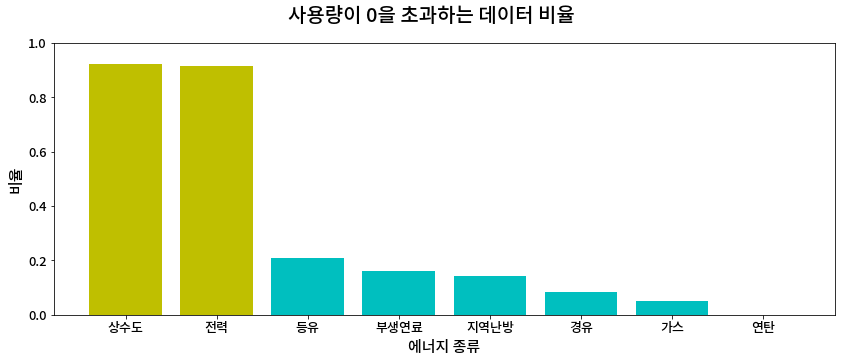

In [0]:
from IPython.display import Image
Image('./images/pandas_quiz_3_fig1.png')

위의 그림은 다음과 같은 조건을 가짐. 조건을 보고 위의 그래프와 유사한 그래프를 그려보기
1.   figure size는 (14, 5)
2.   title: 사용량이 0을 초과하는 데이터 비율
3.   bar plot 그리기
4.   x축은 df의 종류, y축은 df의 비율
5.   상수도, 전력의 막대 컬러는 'y', 나머지는 'c'
6.   x축 label은 '비율', 글씨 크기는 15
7.   y축 label은 '에너지 종류', 글씨 크기는 15
8.   y의 범위 (0, 1)



In [0]:
 #--코드 작성--# 

# 7
'전력사용량', '상수도사용량' 상관계수 구하기

In [60]:
'''
output:
 	          전력사용량    상수도사용량
전력사용량 	    1.00000 	 0.13237
상수도사용량 	0.13237 	 1.00000
'''
 #--코드 작성--# 

energy[['전력사용량','상수도사용량']].corr()

,전력사용량,상수도사용량
전력사용량,1.000000,0.126344
상수도사용량,0.126344,1.000000


# 8
1차사업소, 사용년월, 전력사용량만 있는 데이터를 energy_elect 이라는 변수에 저장  
마찬가지로, 1차사업소, 사용년월, 상수도사용량만 있는 데이터를 energy_water 이라는 변수에 저장  


In [63]:
'''
energy_elect
output:
 	1차 사업소 	사용년월 	전력사용량
0 	강원본부 	201901 	1818968
1 	강원본부 	201902 	1751332
2 	강원본부 	201903 	1416864
3 	강원본부 	201904 	1361492
4 	강원본부 	201905 	1202208
... 	... 	... 	...
284 rows × 3 columns

'''
energy_elect = energy[['1차 사업소', '사용년월', '전력사용량']].copy() #--코드 작성--# 
energy_elect

,1차 사업소,사용년월,전력사용량
0,강원본부,2019-01-01,1818968
1,강원본부,2019-02-01,1751332
2,강원본부,2019-03-01,1416864
3,강원본부,2019-04-01,1361492
4,강원본부,2019-05-01,1202208
...,...,...,...
305,한국전력,2019-07-01,269901
306,한국전력,2019-09-01,256295
307,한국전력,2019-10-01,227905
308,한국전력,2019-12-01,249005


In [0]:
'''
energy_water
output:
 	1차사업소 	사용년월 	상수도사용량
0 	강원본부 	201901 	2708.0
1 	강원본부 	201902 	2739.0
2 	강원본부 	201903 	2562.0
3 	강원본부 	201904 	3123.0
4 	강원본부 	201905 	3127.0
... 	... 	... 	...
284 rows × 3 columns
'''

energy_water =  #--코드 작성--# 
energy_water

# matplot - 2
1차사업소를 입력값으로 주면 월별 전력사용량과 수도사용량을 나타내는 그래프를 그려주는 함수 작성하기  
[링크](https://matplotlib.org/gallery/api/two_scales.html)를 참고 

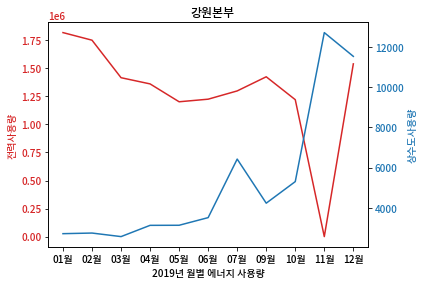

In [0]:
Image('./images/pandas_quiz_3_fig2.png') 
#elect_water_imag('강원본부') 결과 

In [0]:
def elect_water_imag(col):
    #--코드 작성--# 

In [0]:
elect_water_imag('강원본부')

# 9
각 사업소 별로 전력사용량의 평균과 분산을 구해보기  
hint: energy_elect 변수와 agg 메서드를 사용

In [65]:
'''
output:

 	              전력사용량
             	mean 	        std
1차사업소 		
강원본부 	   1.296467e+06 	4.769743e+05
경기본부 	   3.158448e+06 	1.104153e+06
경기북부본부   1.642636e+06 	5.955534e+05
경남본부 	   1.519734e+06 	5.214327e+05
....
'''

## ~별로면 groupby
 #--코드 작성--# 

energy_elect.groupby('1차 사업소').agg({})


# 10
평균 전력사용량이 높은 1차사업소 5군데 구해보기  

In [0]:
'''
output:
 	            전력사용량
1차사업소 	
남서울본부 	    3.315647e+06
경기본부 	    3.158448e+06
서울본부 	    2.769602e+06
부산울산본부 	2.244414e+06
경영지원처 	    2.122448e+06
'''
 #--코드 작성--# 

# 11
* 평균 '전력사용량'이 높은 월을 순서대로 5개월 구해보기  
* 평균 '상수도사용량'이 높은 월을 순서대로 5개월 구해보기  

In [0]:
'''
output:
 	     상수도사용량
사용년월 	
201911 	41275.208333
201905 	39272.538462
201906 	35000.230769
201912 	32031.634615
201907 	21887.923077
'''
 #--코드 작성--# 

In [0]:
'''
output:
 	     상수도사용량
사용년월 	
201911 	41275.208333
201905 	39272.538462
201906 	35000.230769
201912 	32031.634615
201907 	21887.923077
'''
 #--코드 작성--# 

# 12.
* '1차사업소'별 평균 '전력사용량'과 평균 '상수도사용량'의 상관계수 구하기  
* '사용년월'별 평균 '전력사용량'과 평균 '상수도사용량'의 상관계수 구하기

In [0]:
'''
output:
 	           전력사용량   상수도사용량
전력사용량 	    1.000000 	0.397084
상수도사용량 	0.397084 	1.000000
'''
 #--코드 작성--# 

In [0]:
'''
output:
 	           전력사용량   상수도사용량
전력사용량 	    1.000000 	-0.574561
상수도사용량 	-0.574561 	 1.000000
'''
 #--코드 작성--# 